## Введение.

Нам предстоит провести исследование факторов успешности продаж компьютерных игр. Для этого в нашем распоряжении имеется датасет games.csv, который представляет собой выборку данных о продажах игр. 

Мы изучим как менялось количество выпущенных игр по годам, как менялись с течением времени продажи игр для наиболее популярных платформ. 

Мы выберем наиболее перспективные платформы, для которых мы можем обоснованно ожидать рост продаж в 2017 году.

Изучим связь оценок критиков и пользователей с общими продажами.

Исследуем продажи игр по жанрам и установим, по каким жанрам наблюдались наилучшие продажи.

Определим топ платформ по популярности для каждого из регионов, а также топ жанров по популярности для каждого из регионов.

Рассмотрим, как отличаются продажи внутри каждого из регионов в зависимости от рейтинга ESRB.

А также проверим гипотезы о равенстве средних двух генеральных совокупностей (в одном случае проверим гипотезу о равенстве средних пользовательских рейтингов платформ xone и pc, а в другом случае - о равенстве средних пользовательских рейтингов жанров Action и Sports).

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from scipy import stats as st

from statistics import median

In [2]:
df = pd.read_csv('games.csv')

Познакомимся с таблицей: выведем на экран первые 20 строк таблицы. 

In [3]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем на экран общую информацию о таблице и хранящихся в ней данных. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.shape

(16715, 11)

Таблица состоит из 16715 строк и 11 столбцов. 

Посчитаем количество пропусков в столбцах таблицы. 

In [6]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
#print('Доля строк, в которых пропущено значение в столбце year_of_release:', f'{269/16715:.1%}')

## Предобработка данных. 

Проверим таблицу на наличие явных дубликатов (должно быть "0", если явных дубликатов нет). 

In [8]:
df.duplicated().sum()

0

Выведем на экран названия столбцов. 

In [9]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Все символы в названиях столбцов сделаем строчными. 

In [10]:
df.columns = df.columns.str.lower()

Проверим результат изменения названий в колонках. 

In [11]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [12]:
df['platform'] = df['platform'].str.lower()
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [13]:
df['genre'] = df['genre'].str.lower()
df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

Поработаем с пропусками в столбце 'user_score'. Выведем на экран список уникальных значений, содержащихся в столбце "user_score".

In [14]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Помимо привычного nan, в столбце хранятся данные, обозначенные как tbd. Аббревиатура tbd обозначает "to be determined", т.е. "будет определено". Это значит, что сейчас данных нет. Такие значения могут быть заменены на nan: сделаем это (для этого нам понадобится воспользоваться возможностями библиотеки numpy).

In [15]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

Проверим результаты замены tbd на nan.

In [16]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [17]:
df['user_score'].isna().sum()

9125

Значения tbd заменены на nan. Количество пропусков в столбце 'user_score' увеличилось с 6701 до 9125. 

Сейчас данные в столбце 'user_score' хранятся в формате object, и нам необходимо преобразовать их в вещественный тип float (это нужно, чтобы данные из столбца 'user_score' могли участвовать в математических операциях в будущем анализе).   

In [18]:
df['user_score'] = df['user_score'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Поработаем с пропусками в столбце "rating". Заполненим часть пропусков в столбце модой, т.е. значением, которое встречается чаще всего при оценке одной игры на разных платформах (предварительно удалим 2 игры, для которых в таблице не указаны названия).

In [19]:
df['rating'].isna().sum()

6766

In [20]:
def my_mode(s):
    mode = s.mode()
    if len(mode) > 0:
        return mode[0]
    return None

In [21]:
df = df.dropna(subset=['name']) 
df_rating_transformed = df.groupby('name')['rating'].transform(my_mode)
df['rating'] = df['rating'].fillna(df_rating_transformed)

In [22]:
df['rating'].isna().sum()

6327

Количество пропусков в столбце 'rating' уменьшилось. Оставшиеся пропуски заполним значением 'not_classified'. Посмотрим количество игр с каждым из рейтингов. 

In [23]:
df['rating'] = df['rating'].fillna('not_classified')

In [24]:
df['rating'].value_counts()

not_classified    6327
E                 4153
T                 3090
M                 1654
E10+              1471
EC                  10
K-A                  4
RP                   3
AO                   1
Name: rating, dtype: int64

В соответствии с документацией к данным, в столбце rating хранятся данные о том, какой возрастной группе, по оценке организации ESRB, подходит игра. 

Так, приняты следующие обозначения:

Е - "Для всех";

Т - "Подросткам";

М - "Для взрослых";

Е10+ - "Для всех от 10 лет и старше";

***

ЕС - "Для детей младшего возраста";

К-А - не определено;

RP - "Рейтинг ожидается"

АО - "Только для взрослых". 

***

Суммарное количество игр, относящихся к рейтингам ЕС, К-А, RP, АО, равно 18. Удалим эти игры из таблицы. 

In [25]:
df = df.query('rating != "EC" and rating != "K-A" and rating != "RP" and rating != "AO"')

In [26]:
df['rating'].value_counts()

not_classified    6327
E                 4153
T                 3090
M                 1654
E10+              1471
Name: rating, dtype: int64

In [27]:
df.isna().sum()

name                  0
platform              0
year_of_release     267
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8563
user_score         9112
rating                0
dtype: int64

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [28]:
df['summ_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<b>Промежуточный вывод:</b> мы удалили наблюдения с пропусками в столбцах name и genre, заполнили часть пропусков в столбце rating и удалили наблюдения с неизвестными нам рейтингами. В столбце user_score заменили значения tbd на nan. Сейчас пропуски остаются в столбцах year_of_release, critic_score, user_score.   

## Исследовательский анализ данных. 

Посмотрим, сколько игр выпускалось в разные годы. Для этого построим сводную таблицу, которая будет состоять из двух столбцов: "year_of_release" и "games_per_year". 

In [29]:
df_count_games_per_year = df.pivot_table(index=['year_of_release'], values='platform', aggfunc=['count'])

df_count_games_per_year = df_count_games_per_year.reset_index()

df_count_games_per_year.columns = ['year_of_release', 'games_per_year']

df_count_games_per_year

,year_of_release,games_per_year
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


Визуализируем полученные данные на графике. 

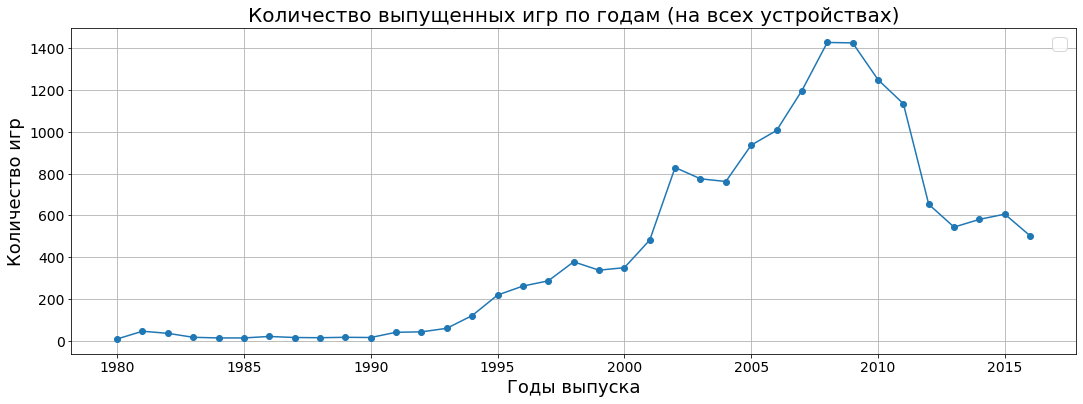

In [30]:
df_count_games_per_year.plot(style='o-', x = 'year_of_release', y = 'games_per_year', figsize = (18, 6))
plt.title('Количество выпущенных игр по годам (на всех устройствах)', fontsize=20)
plt.xlabel('Годы выпуска', fontsize=18)
plt.ylabel('Количество игр', fontsize=18)
plt.legend('', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid();

Мы построили график по данным, в которых игра, если она в один год вышла на более чем одном устройстве, считается как более чем одна игра (как две, если игра вышла на двух платформах, или как три, если игра вышла на трёх платформах, и т.д.). 

Произведем расчеты, чтобы учитывать каждую игру только один раз, даже если в один год она вышла на более чем одном устройстве. Для этого снова построим сводную таблицу, но уже из трёх столбцов: "year_of_release", "name" и "platform".  

In [31]:
df_count_unique_games_per_year = df.pivot_table(index=['year_of_release', 'name'], values='platform', aggfunc=['count'])

df_count_unique_games_per_year = df_count_unique_games_per_year.reset_index()

df_count_unique_games_per_year.columns = ['year_of_release', 'name', 'platform']

df_count_unique_games_per_year

,year_of_release,name,platform
0,1980.0,Asteroids,1
1,1980.0,Boxing,1
2,1980.0,Bridge,1
3,1980.0,Checkers,1
4,1980.0,Defender,1
...,...,...,...
12180,2016.0,Ys VIII: Lacrimosa of Dana,1
12181,2016.0,Yuusha Shisu.,1
12182,2016.0,Zero Escape: Zero Time Dilemma,2
12183,2016.0,Zettai Kaikyuu Gakuen: Eden with Roses and Pha...,1


В таблице приведены данные о том, на каком количестве платформ вышла каждая из игр, вышедшая в определенный год. 

Теперь на основе этой таблицы создадим новую сводную таблицу из двух столбцов: "year_of_release" и "count_unique_games_per_year". 

In [32]:
df_count_unique_games_per_year_result = df_count_unique_games_per_year.pivot_table(index=['year_of_release'], 
                                                                                   values='platform', aggfunc=['count'])

df_count_unique_games_per_year_result = df_count_unique_games_per_year_result.reset_index()

df_count_unique_games_per_year_result.columns = ['year_of_release', 'count_unique_games_per_year']

df_count_unique_games_per_year_result

,year_of_release,count_unique_games_per_year
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


Снова построим график на данных из полученной сводной таблицы. 

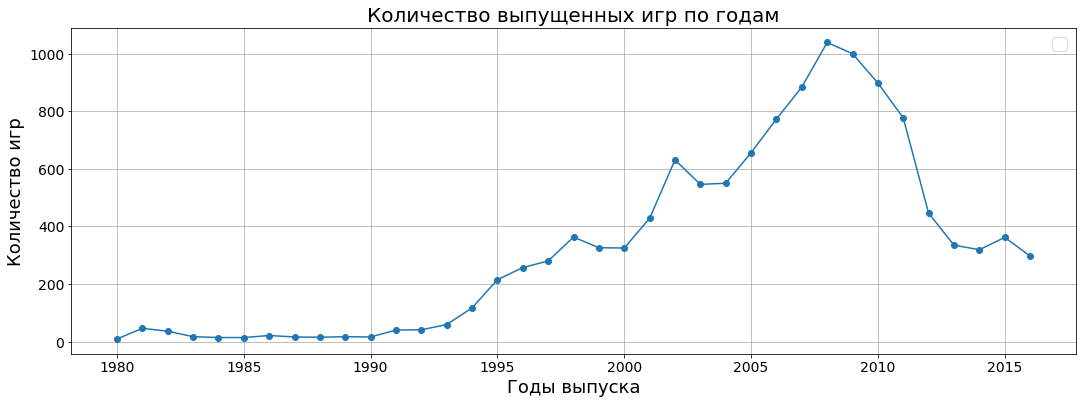

In [33]:
df_count_unique_games_per_year_result.plot(style='o-', x = 'year_of_release', y = 'count_unique_games_per_year', figsize = (18, 6))
plt.title('Количество выпущенных игр по годам', fontsize=20)
plt.xlabel('Годы выпуска', fontsize=18)
plt.ylabel('Количество игр', fontsize=18)
plt.legend('', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid();

Изобразим оба графика вместе. 

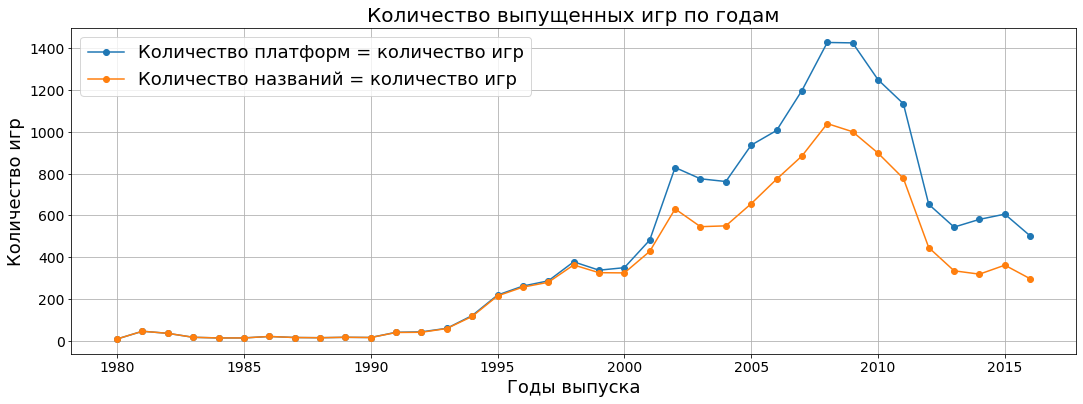

In [34]:
ax = df_count_games_per_year.plot(style='o-', x = 'year_of_release', y = 'games_per_year', figsize = (18, 6))

df_count_unique_games_per_year_result.plot(style='o-', x = 'year_of_release', 
                                           y = 'count_unique_games_per_year', ax=ax, figsize = (18, 6))

plt.title('Количество выпущенных игр по годам', fontsize=20)
plt.xlabel('Годы выпуска', fontsize=18)
plt.ylabel('Количество игр', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Количество платформ = количество игр', 'Количество названий = количество игр'], fontsize=18)
plt.grid();

Посмотрим, как менялись продажи с течением времени по платформам. Для этого, для начала, построим сводную таблицу с данными о суммарных продажах на каждой из платформ. Визуализируем полученные данные на графике. 

In [35]:
df_platform_summ_sales = df.pivot_table(index=['platform'], values='summ_sales', aggfunc=['sum'])

df_platform_summ_sales = df_platform_summ_sales.reset_index()

df_platform_summ_sales.columns = ['platform', 'summ_sales']

df_platform_summ_sales = df_platform_summ_sales.sort_values(by='summ_sales', ascending=False)

df_platform_summ_sales

,platform,summ_sales
16,ps2,1255.53
28,x360,971.42
17,ps3,939.65
25,wii,906.85
4,ds,804.92
15,ps,728.86
6,gba,317.85
18,ps4,314.14
19,psp,294.05
2,3ds,259.00


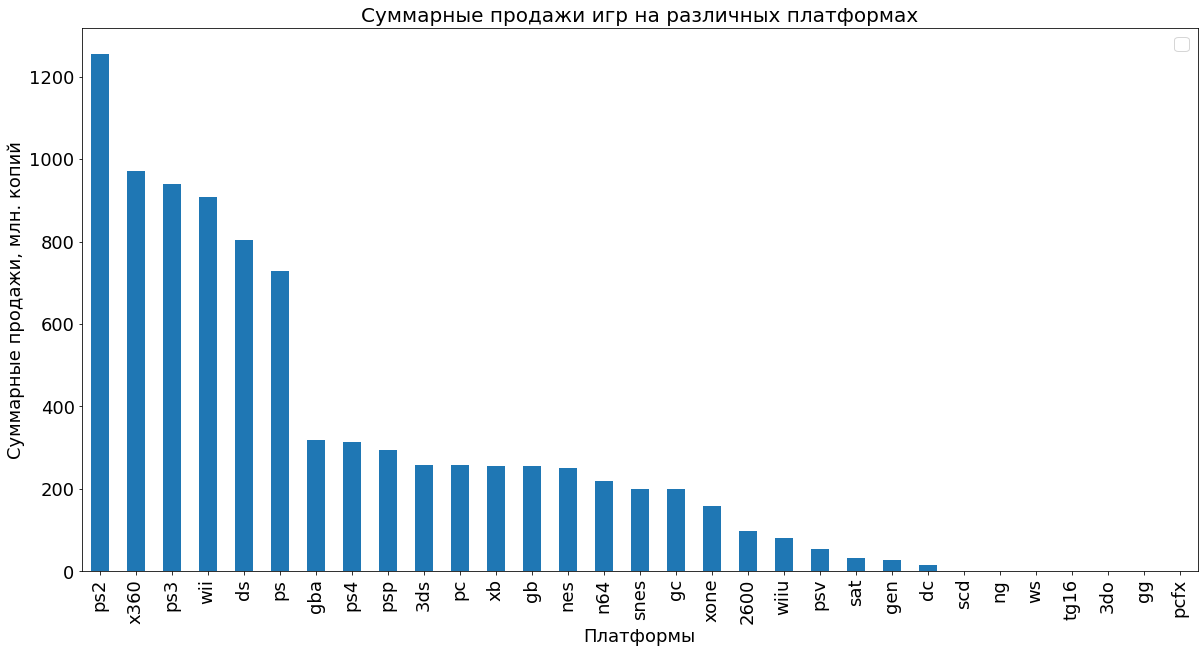

In [36]:
df_platform_summ_sales.plot.bar(x = 'platform', y = 'summ_sales', figsize = (20, 10))

plt.title('Суммарные продажи игр на различных платформах', fontsize=20)
plt.xlabel('Платформы', fontsize=18)
plt.ylabel('Суммарные продажи, млн. копий', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend([], fontsize=18);

Можно выделить Топ-6 платформ с наибольшими суммарными продажами: ps2, x360, ps3, wii, ds, ps.

In [37]:
df_top_6_platforms = np.array(df_platform_summ_sales.sort_values(by = 'summ_sales', ascending = False).head(6)['platform'])

df_top_6_platforms

array(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps'], dtype=object)

Создадим новую таблицу, в которой оставим данные только об играх, вышедших на платформах из числа топ-6.

In [38]:
df_top_6 = df[df.platform.isin(df_top_6_platforms)] 

Посмотрим, как менялись продажи с течением времени на этих шести платформах. Создадим сводную таблицу, сделаем срезы для каждой из платформ, построим графики. 

In [39]:
df_top_6_pivot = df_top_6.pivot_table(index=['platform', 'year_of_release'], values='summ_sales', aggfunc=['sum'])

df_top_6_pivot = df_top_6_pivot.reset_index()

df_top_6_pivot.columns = ['platform', 'year_of_release', 'summ_sales']

df_top_6_pivot

,platform,year_of_release,summ_sales
0,ds,1985.0,0.02
1,ds,2004.0,17.27
2,ds,2005.0,130.14
3,ds,2006.0,119.81
4,ds,2007.0,146.94
...,...,...,...
62,x360,2012.0,99.74
63,x360,2013.0,88.58
64,x360,2014.0,34.74
65,x360,2015.0,11.96


Отрисуем 6 графиков, используя для этого цикл for. 

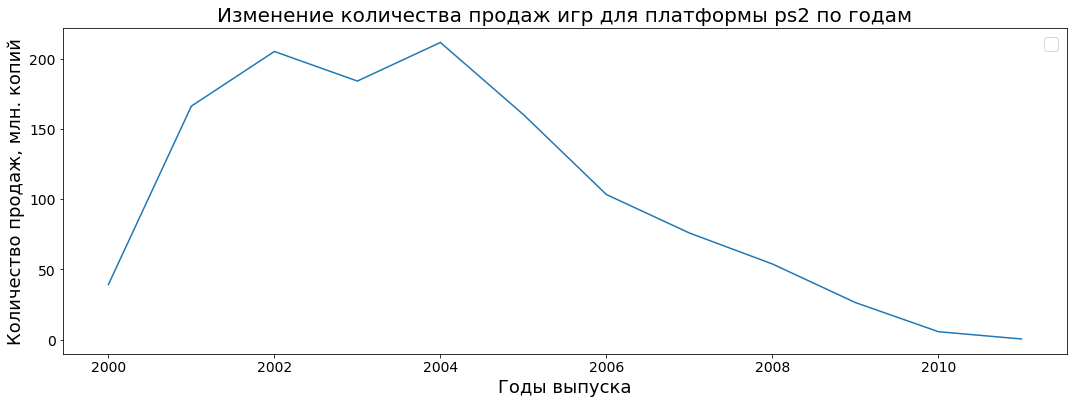

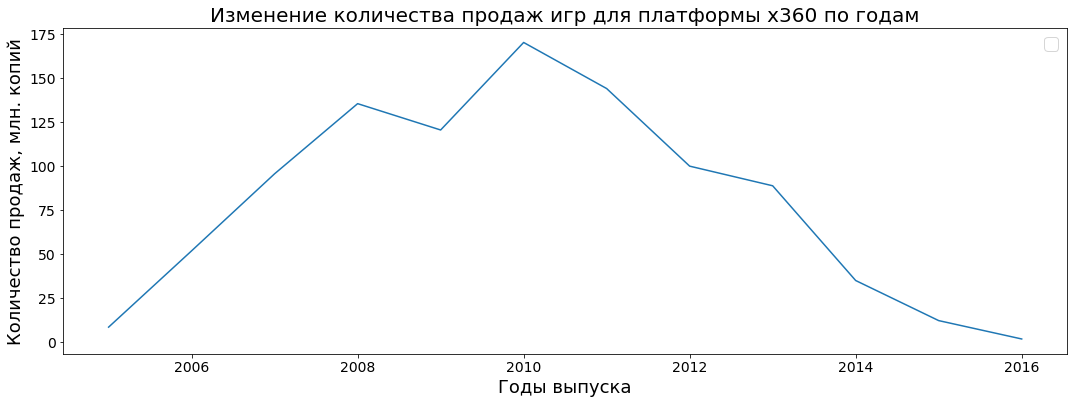

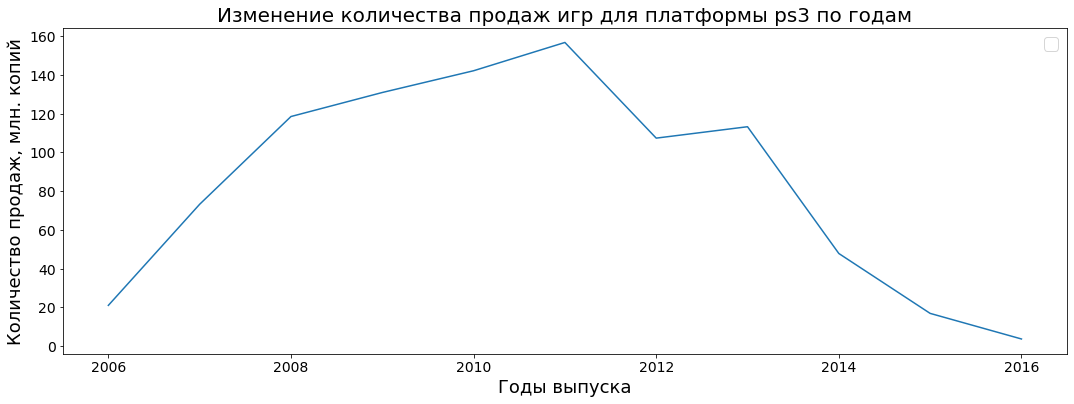

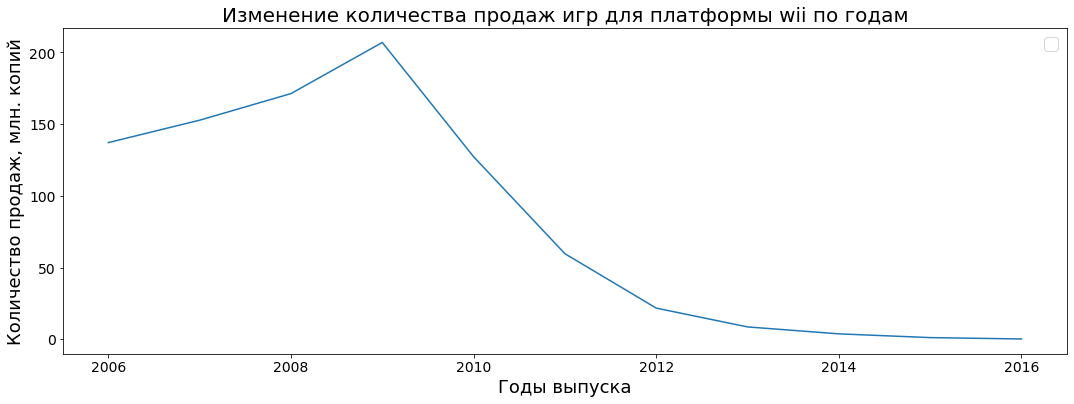

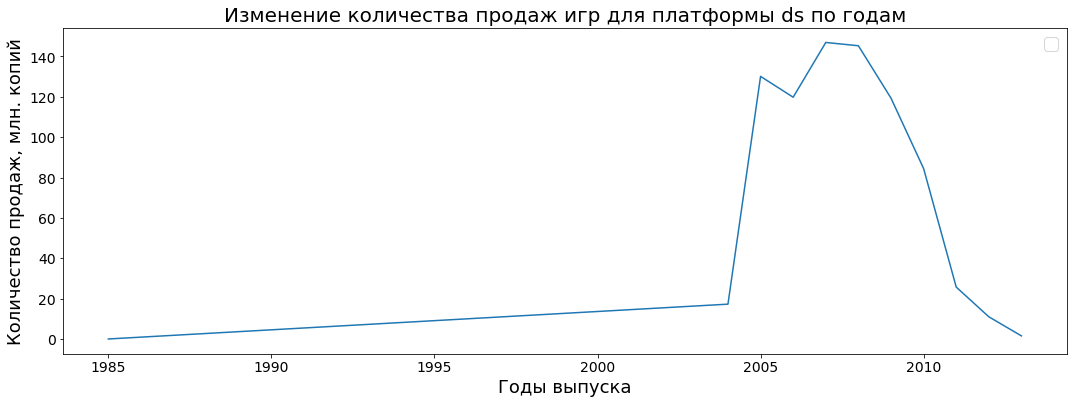

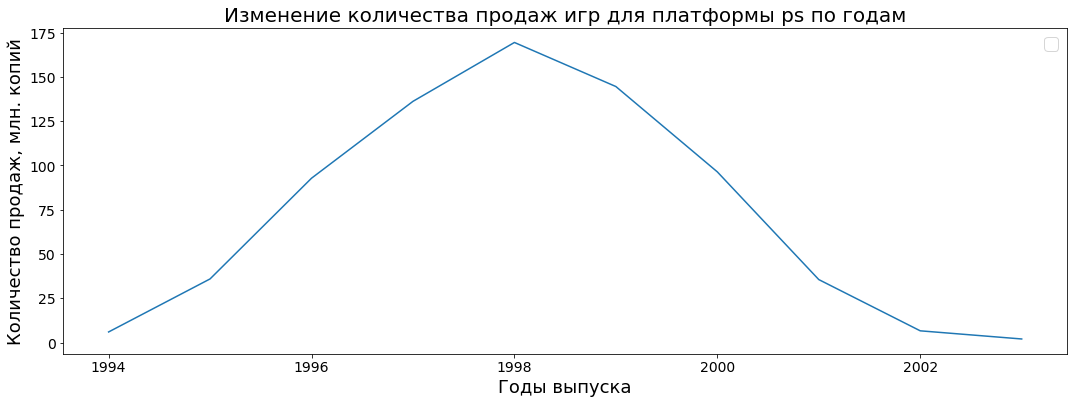

In [40]:
top_platform = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']
 
for each_platform in top_platform:
    df_top_6_pivot[df_top_6_pivot['platform']==each_platform].plot(x="year_of_release", y="summ_sales", figsize = (18, 6))

    plt.title(f'Изменение количества продаж игр для платформы {each_platform} по годам', fontsize=20)
    plt.xlabel('Годы выпуска', fontsize=18)
    plt.ylabel('Количество продаж, млн. копий', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend([], fontsize=18)
    plt.show();
    
 

Изобразим все 6 графиков вместе. 

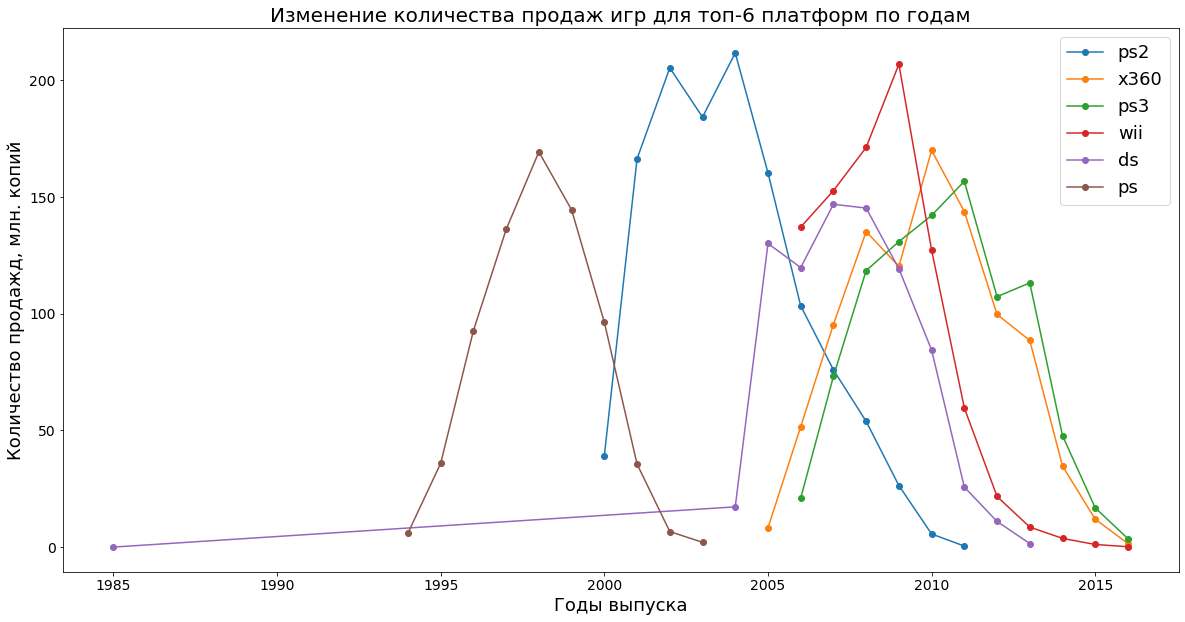

In [41]:
df_PS2 = df_top_6_pivot.query('platform == "ps2"')

df_X360 = df_top_6_pivot.query('platform == "x360"')

df_PS3 = df_top_6_pivot.query('platform == "ps3"')

df_Wii = df_top_6_pivot.query('platform == "wii"')

df_DS = df_top_6_pivot.query('platform == "ds"')

df_PS = df_top_6_pivot.query('platform == "ps"')

ax = df_PS2.plot(style='o-', x = 'year_of_release', y = 'summ_sales', figsize = (20, 10))

df_X360.plot(style='o-', x = 'year_of_release', y = 'summ_sales', ax=ax, figsize = (20, 10))

df_PS3.plot(style='o-', x = 'year_of_release', y = 'summ_sales', ax=ax, figsize = (20, 10))

df_Wii.plot(style='o-', x = 'year_of_release', y = 'summ_sales', ax=ax, figsize = (20, 10))

df_DS.plot(style='o-', x = 'year_of_release', y = 'summ_sales', ax=ax, figsize = (20, 10))

df_PS.plot(style='o-', x = 'year_of_release', y = 'summ_sales', ax=ax, figsize = (20, 10))

plt.title('Изменение количества продаж игр для топ-6 платформ по годам', fontsize=20)
plt.xlabel('Годы выпуска', fontsize=18)
plt.ylabel('Количество продажд, млн. копий', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps'], fontsize=18);

Основываясь на данных об изменении продаж игр для рассмотренных нами топ-6 платформ, определим характерные сроки, в течение которых появляются новые и исчезают старые платформы. Судя по приведенному выше графику "Изменение количества продаж игр для топ-6 платформ по годам", новые платформы появляются с характерной периодичностью в 6 лет. 

Рассчитаем медианное значение длительности существования платформы. 

In [42]:
periods = [(df_PS2['year_of_release'].max() - df_PS2['year_of_release'].min()), \
(df_X360['year_of_release'].max() - df_X360['year_of_release'].min()), \
(df_PS3['year_of_release'].max() - df_PS3['year_of_release'].min()), \
(df_Wii['year_of_release'].max() - df_Wii['year_of_release'].min()), \
(df_DS['year_of_release'].max() - df_DS['year_of_release'].min()), \
(df_PS['year_of_release'].max() - df_PS['year_of_release'].min())]

av_period = round(median(periods))

av_period

10

Типичной продолжительностью существования платформы будем считать 10 лет. 

Теперь нужно определить тот срок, за который мы будем брать данные о продажах, чтобы на их основе делать прогноз на 2017 год. Мы определили, что новые платформы появляются с периодичностью примерно через 6 лет. На графике можно увидеть, что продажи игр для новой платформы выходят на пиковый уровень обычно примерно после трёх лет после появления. Последняя из платформ, отображенных на графике, появилась в 2006 году (ps3). Будем строить наш анализ на данных с 2012 года. Создадим таблицу, которая содержат данные за актуальный для исследования период.  

In [43]:
df_actual = df.query('year_of_release >= 2012')

Проверим количество строк в полученной таблице. 

In [44]:
df_actual.shape[0]

2886

Построим сводную таблицу, которая будет состоять из столбцов "platform", "year_of_release" и "summ_sales". 

In [45]:
df_actual_pivot = df_actual.pivot_table(index=['platform', 'year_of_release'], values='summ_sales', aggfunc=['sum'])

df_actual_pivot = df_actual_pivot.reset_index()

df_actual_pivot.columns = ['platform', 'year_of_release', 'summ_sales']

df_actual_pivot

,platform,year_of_release,summ_sales
0,3ds,2012.0,51.36
1,3ds,2013.0,56.57
2,3ds,2014.0,43.76
3,3ds,2015.0,27.78
4,3ds,2016.0,15.14
5,ds,2012.0,11.01
6,ds,2013.0,1.54
7,pc,2012.0,23.22
8,pc,2013.0,12.38
9,pc,2014.0,13.28


Построим график, на котором покажем, как изменялось количество продаж на каждой из платформ в период между 2012 и 2016 годами (отметим, что данные о продажах за 2016 год могут быть неполные, поэтому относительно низкие продажи в 2016 году объяснимы). 

In [46]:
df_actual_pivot['platform'].unique()

array(['3ds', 'ds', 'pc', 'ps3', 'ps4', 'psp', 'psv', 'wii', 'wiiu',
       'x360', 'xone'], dtype=object)

In [47]:
df_3ds = df_actual_pivot.query('platform == "3ds"')

df_ds = df_actual_pivot.query('platform == "ds"')

df_pc = df_actual_pivot.query('platform == "pc"')

df_ps3 = df_actual_pivot.query('platform == "ps3"')

df_ps4 = df_actual_pivot.query('platform == "ps4"')

df_psp = df_actual_pivot.query('platform == "psp"')

df_psv = df_actual_pivot.query('platform == "psv"')

df_wii = df_actual_pivot.query('platform == "wii"')

df_wiiu = df_actual_pivot.query('platform == "wiiu"')

df_x360 = df_actual_pivot.query('platform == "x360"')

df_xone = df_actual_pivot.query('platform == "xone"')

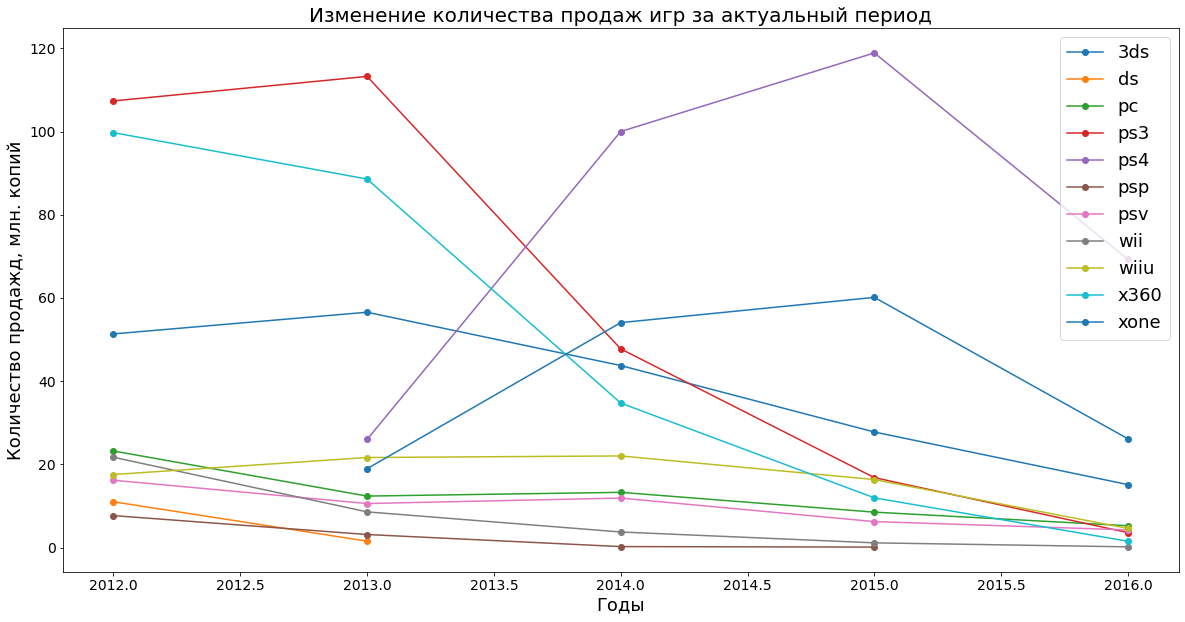

In [48]:
ax = df_3ds.plot(style='o-', x = 'year_of_release', y = 'summ_sales', figsize = (20, 10))

df_ds.plot(style='o-', x = 'year_of_release', y = 'summ_sales', ax=ax, figsize = (20, 10))

df_pc.plot(style='o-', x = 'year_of_release', y = 'summ_sales', ax=ax, figsize = (20, 10))

df_ps3.plot(style='o-', x = 'year_of_release', y = 'summ_sales', ax=ax, figsize = (20, 10))

df_ps4.plot(style='o-', x = 'year_of_release', y = 'summ_sales', ax=ax, figsize = (20, 10))

df_psp.plot(style='o-', x = 'year_of_release', y = 'summ_sales', ax=ax, figsize = (20, 10))

df_psv.plot(style='o-', x = 'year_of_release', y = 'summ_sales', ax=ax, figsize = (20, 10))

df_wii.plot(style='o-', x = 'year_of_release', y = 'summ_sales', ax=ax, figsize = (20, 10))

df_wiiu.plot(style='o-', x = 'year_of_release', y = 'summ_sales', ax=ax, figsize = (20, 10))

df_x360.plot(style='o-', x = 'year_of_release', y = 'summ_sales', ax=ax, figsize = (20, 10))

df_xone.plot(style='o-', x = 'year_of_release', y = 'summ_sales', ax=ax, figsize = (20, 10))

plt.title('Изменение количества продаж игр за актуальный период', fontsize=20)
plt.xlabel('Годы', fontsize=18)
plt.ylabel('Количество продажд, млн. копий', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['3ds', 'ds', 'pc', 'ps3', 'ps4', 'psp', 'psv', 'wii', 'wiiu', 'x360', 'xone'], fontsize=18);

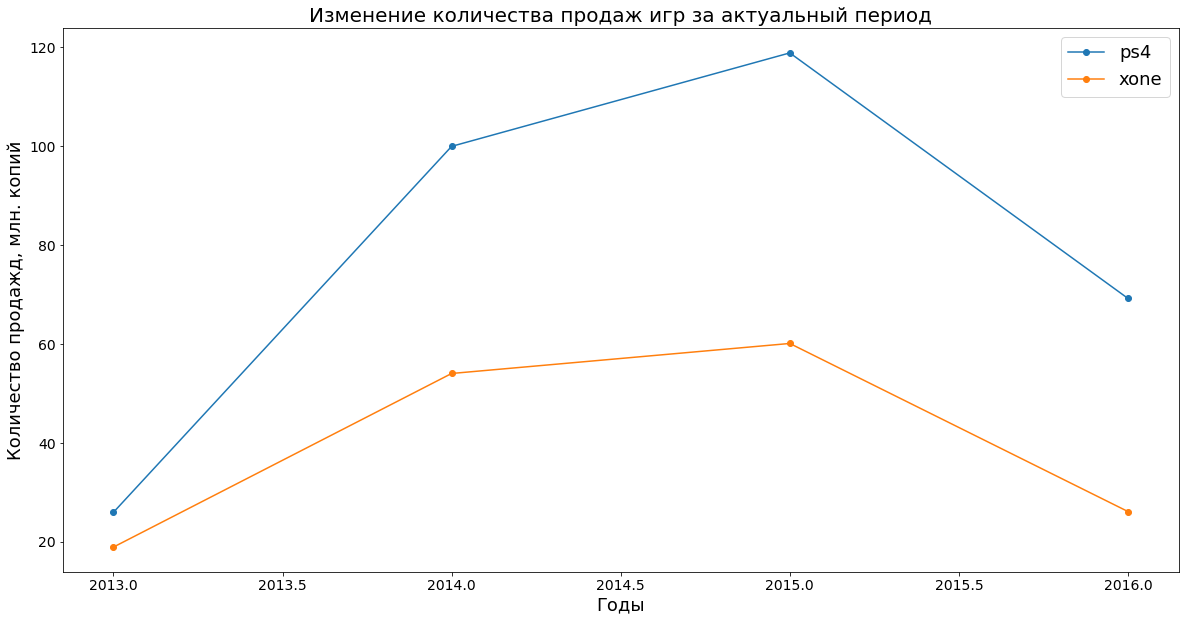

In [49]:
ax = df_ps4.plot(style='o-', x = 'year_of_release', y = 'summ_sales', figsize = (20, 10))
df_xone.plot(style='o-', x = 'year_of_release', y = 'summ_sales', ax=ax, figsize = (20, 10))

plt.title('Изменение количества продаж игр за актуальный период', fontsize=20)
plt.xlabel('Годы', fontsize=18)
plt.ylabel('Количество продажд, млн. копий', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['ps4', 'xone'], fontsize=18);

Растут продажи игр, выпущенных для платформ PS4 и XONE: только для этих платформ игр, выпущенных в 2015 году, было продано больше, чем выпущенных в 2014. Учитывая, что эти платформы появились в 2013 году, то вполне возможны пиковые значения по продажам игр, выпущенных в 2016 году (исходя из документации, данные о продажах за 2016 год сейчас неполные). Скорее всего, продажи игр, выпущенных в 2017 году, на этих двух платформах будут на более высоком, относительно остальных платформ, уровне. Именно эти две платформы мы считаем наиболее перспективными в 2017 году. 

Теперь построим графики "ящик с усами" (boxplot), на которых будут показаны частотные распределения суммарных продаж за период с 2012 года в разбивке по платформам. Для анализа отберем платформы с наибольшими суммарными продажами за период с 2012 года. Для этого построим сводную таблицу, которая будет состоять из двух столбцов: "platform" и "summ_sales". Отсортируем строки в таблице в порядке убывания по столбцу "summ_sales". 

In [50]:
df_actual_pivot_2 = df_actual_pivot.pivot_table(index=['platform'], values='summ_sales', aggfunc=['sum'])

df_actual_pivot_2 = df_actual_pivot_2.reset_index()

df_actual_pivot_2.columns = ['platform', 'summ_sales']

df_actual_pivot_2 = df_actual_pivot_2.sort_values(by='summ_sales', ascending=False)

df_actual_pivot_2

,platform,summ_sales
4,ps4,314.14
3,ps3,288.79
9,x360,236.54
0,3ds,194.61
10,xone,159.32
8,wiiu,82.19
2,pc,62.65
6,psv,49.18
7,wii,35.37
1,ds,12.55


Визуализируем данные из таблицы на графике. 

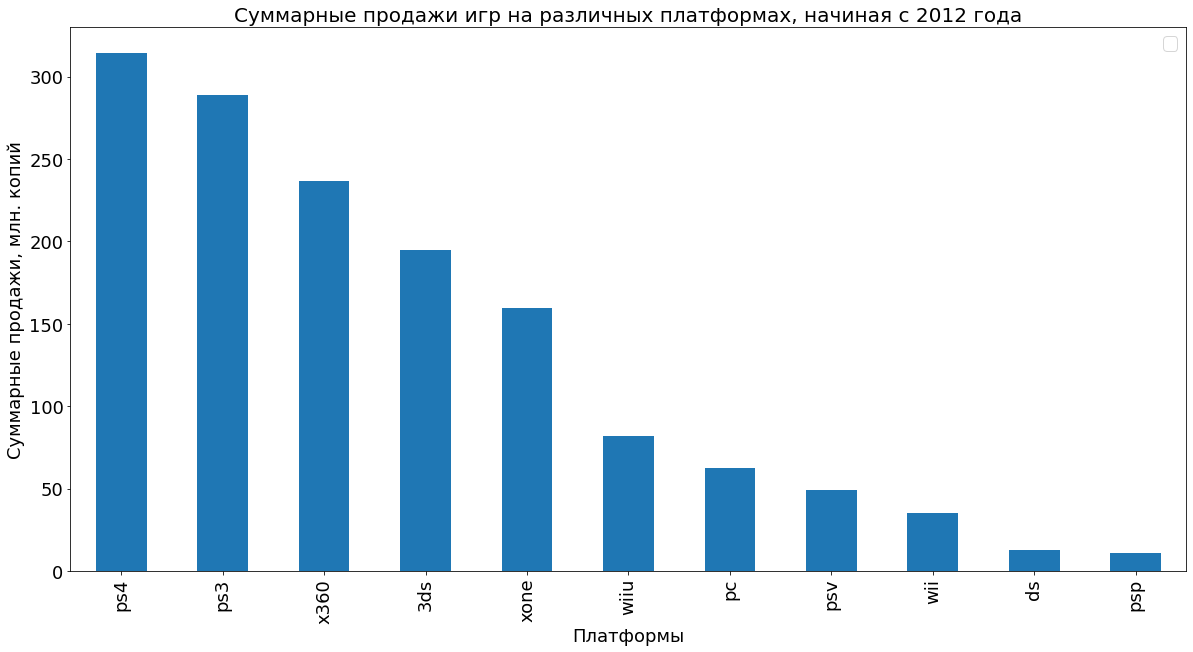

In [51]:
lst = ['ps4', 'ps3', 'x360', '3ds', 'xone', 'wiiu', 'pc', 'psv', 'wii', 'ds', 'psp']

df_actual_pivot_2.plot.bar(x = 'platform', y = 'summ_sales', figsize = (20, 10))

plt.xticks(range(len(lst)), lst)

plt.title('Суммарные продажи игр на различных платформах, начиная с 2012 года', fontsize=20)
plt.xlabel('Платформы', fontsize=18)
plt.ylabel('Суммарные продажи, млн. копий', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend([], fontsize=18);

Для пяти платформ с наибольшими суммарными продажами  (ps4, ps3, x360, 3ds, xone), построим графики "ящик с усами". Для этого сначала приведем данные в удобный для построения графика boxplot вид. 

Построим сводную таблицу. 

In [52]:
df_actual_pivot_for_boxplot = df_actual.pivot_table(index=['platform', 'name'], values='summ_sales', aggfunc=['sum'])

df_actual_pivot_for_boxplot = df_actual_pivot_for_boxplot.reset_index()

df_actual_pivot_for_boxplot.columns = ['platform', 'name', 'summ_sales']

df_actual_pivot_for_boxplot

,platform,name,summ_sales
0,3ds,Beyblade Burst,0.03
1,3ds,Fire Emblem Fates,1.67
2,3ds,Frozen: Olaf's Quest,0.59
3,3ds,Haikyu!! Cross Team Match!,0.04
4,3ds,12-Sai. Honto no Kimochi,0.07
...,...,...,...
2880,xone,XCOM 2,0.04
2881,xone,ZombiU,0.01
2882,xone,Zombie Army Trilogy,0.11
2883,xone,Zoo Tycoon (2013),0.36


In [53]:
platform = df_actual_pivot_for_boxplot.query('platform in ["ps4", "ps3", "x360", "3ds", "xone"]')

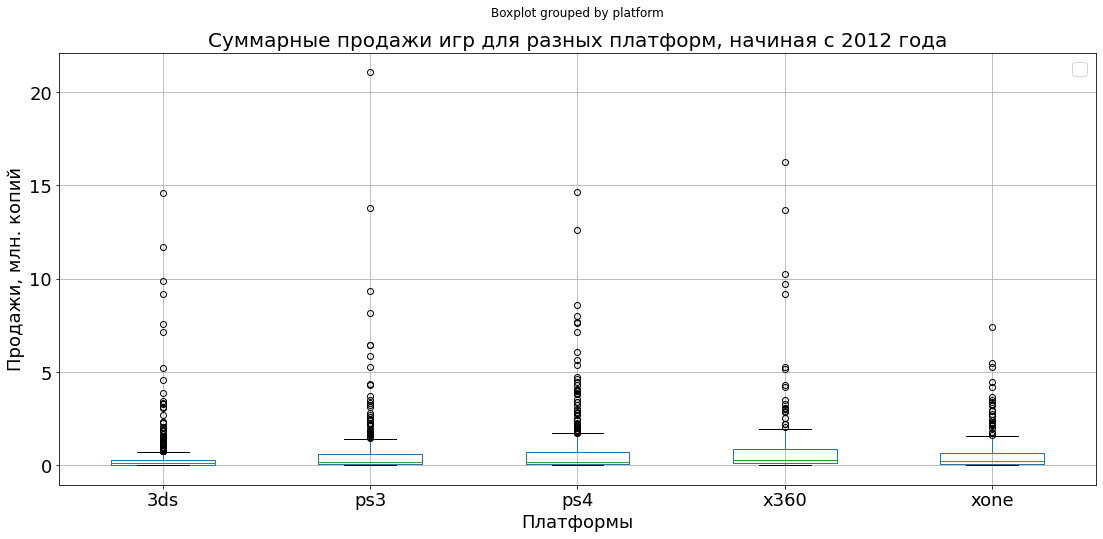

In [54]:
boxplot = platform.boxplot(column='summ_sales', by='platform', figsize=(18, 8))

plt.title('Суммарные продажи игр для разных платформ, начиная с 2012 года', fontsize=20)
plt.xlabel('Платформы', fontsize=18)
plt.ylabel('Продажи, млн. копий', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend([], fontsize=18);

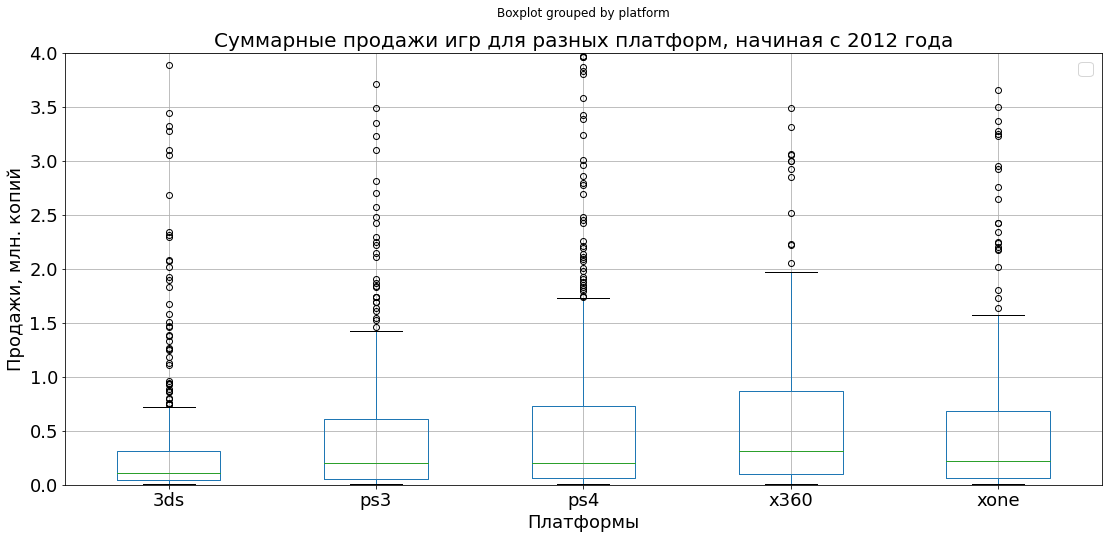

In [55]:
boxplot = platform.boxplot(column='summ_sales', by='platform', figsize=(18, 8))

plt.title('Суммарные продажи игр для разных платформ, начиная с 2012 года', fontsize=20)
plt.xlabel('Платформы', fontsize=18)
plt.ylabel('Продажи, млн. копий', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend([], fontsize=18)
boxplot.set_ylim(0, 4);

Мы видим, что первые квартили и медианные значения продаж для всех выбранных платформ близки друг к другу. Более выраженные отличия наблюдаются в значениях третьего квартиля, и еще большие различия - в границах верхнего "уса". Это свидетельствует о том, что более успешными продажи для определенной платформы делают небольшое количество удачных игр - хитов. 

Среди выбранных пяти платформ самая популярная - x360: она имеет наибольшие медианное и среднее (потому что имеет самую высокую границу верхнего уса) значения продаж. 

Посмотрим, как на продажи внутри этой платформы влияют отзывы критиков и пользователей. 

Ипользуя циклы for, отрисуем диаграммы рассеяния для визуализации связи между оценками критиков/пользователей с общими продажами игр на каждой отобранной платформе, а также рассчитаем коэффициенты корреляции Пирсона.

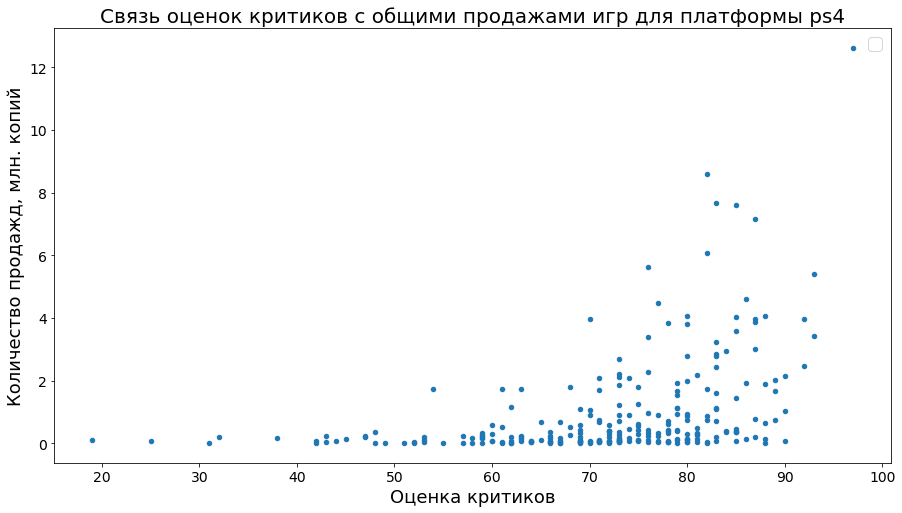

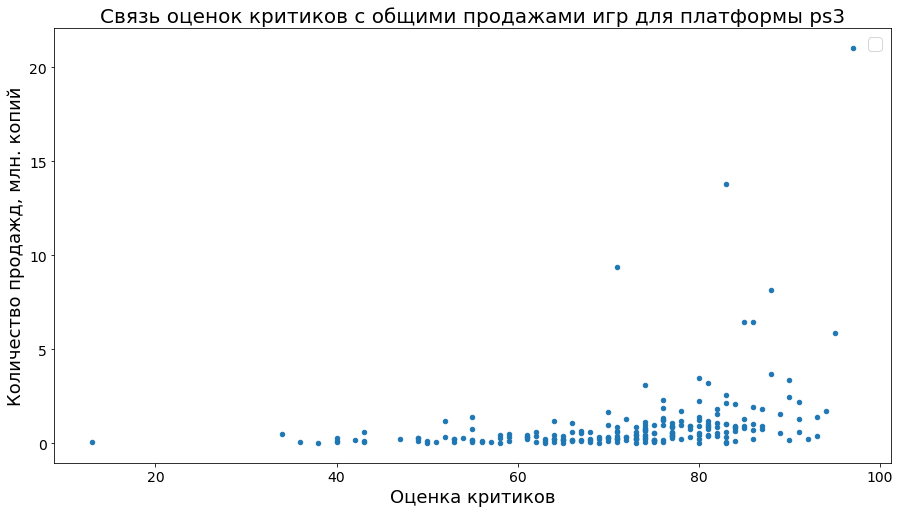

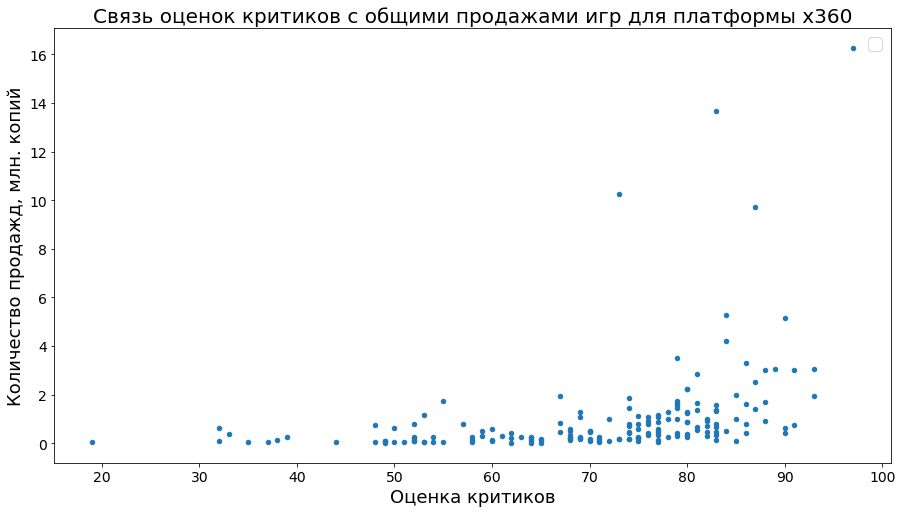

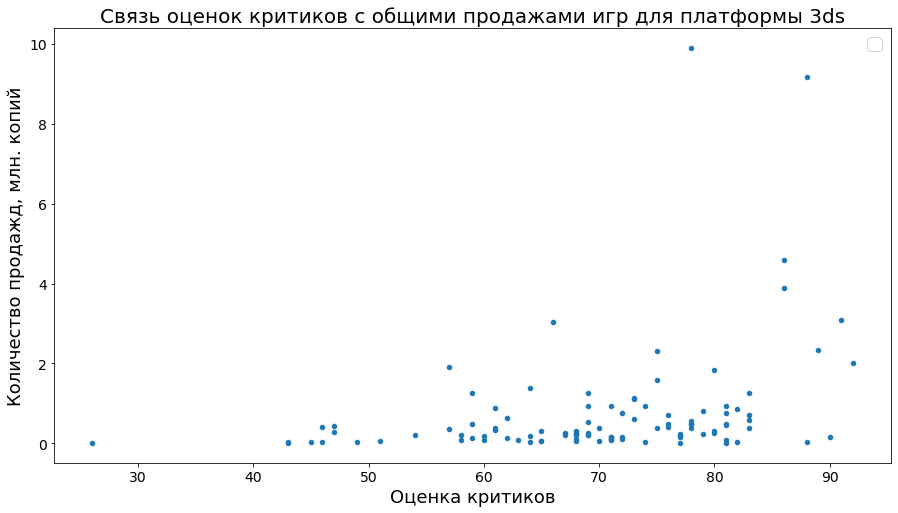

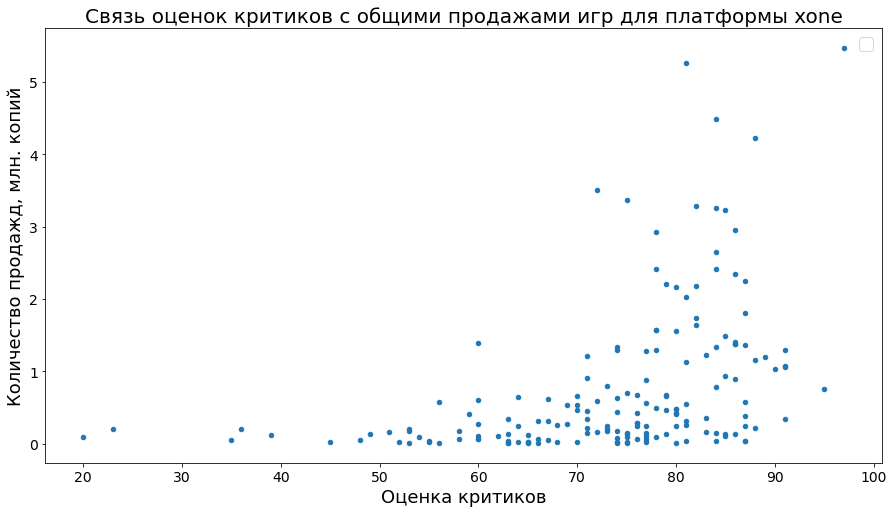

In [56]:
platforms = ['ps4', 'ps3', 'x360',  '3ds', 'xone']
 
for each in platforms:
    df_actual[df_actual['platform']==each].plot(x="critic_score", y="summ_sales", kind='scatter', figsize = (15, 8))

    plt.title(f'Связь оценок критиков с общими продажами игр для платформы {each}', fontsize=20)
    plt.xlabel('Оценка критиков', fontsize=18)
    plt.ylabel('Количество продажд, млн. копий', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend([], fontsize=18)
    plt.show();

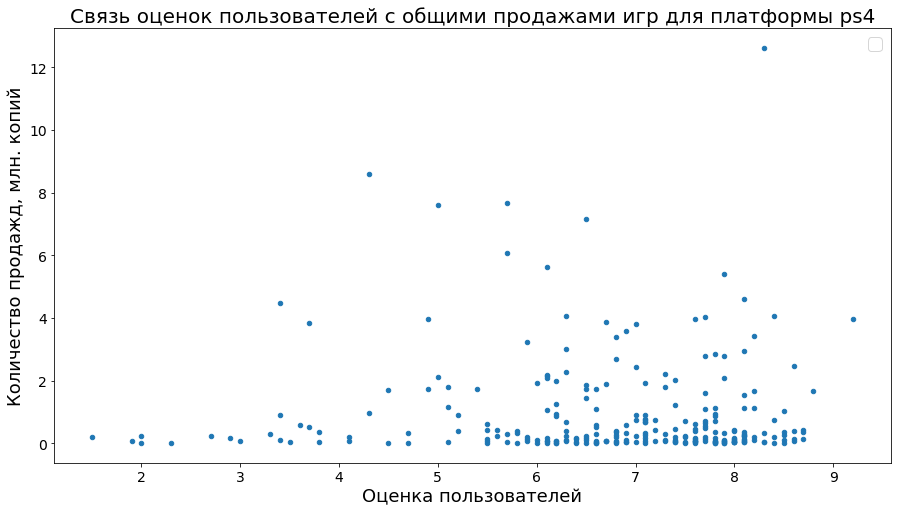

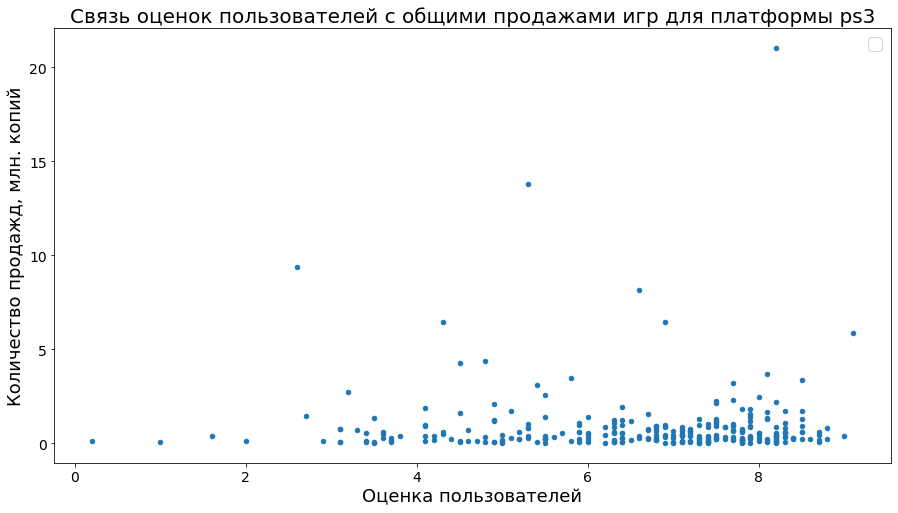

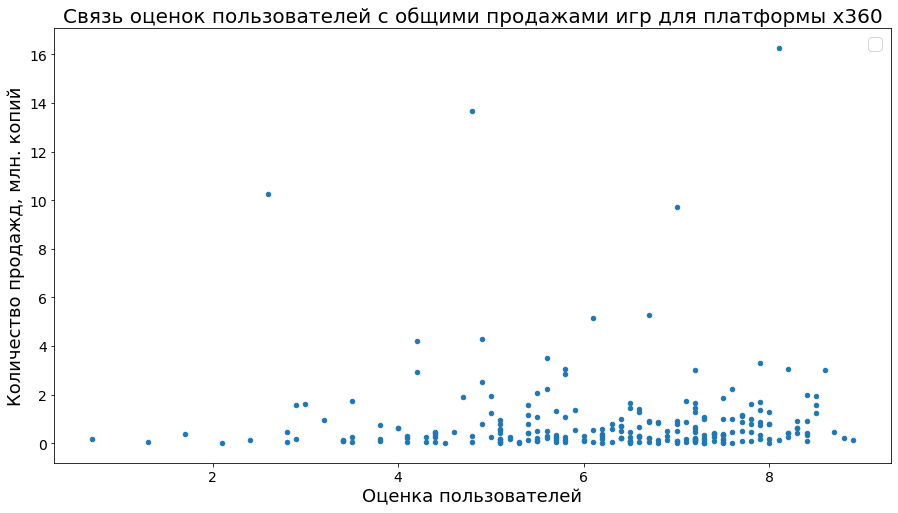

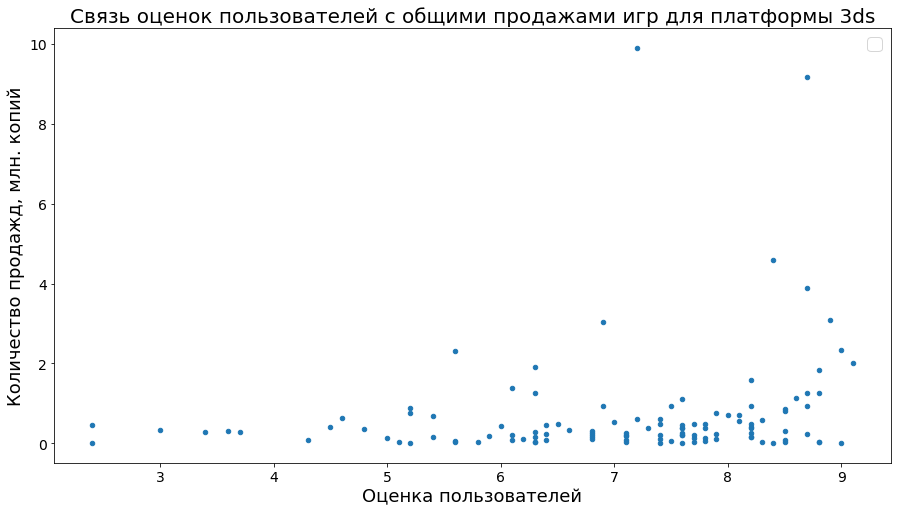

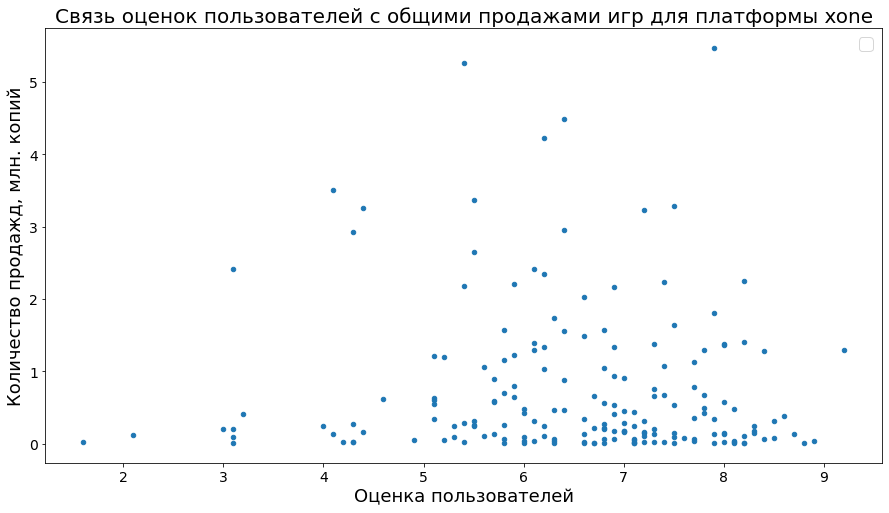

In [57]:
platforms = ['ps4', 'ps3', 'x360',  '3ds', 'xone']
 
for each in platforms:
    df_actual[df_actual['platform']==each].plot(x="user_score", y="summ_sales", kind='scatter', figsize = (15, 8))

    plt.title(f'Связь оценок пользователей с общими продажами игр для платформы {each}', fontsize=20)
    plt.xlabel('Оценка пользователей', fontsize=18)
    plt.ylabel('Количество продажд, млн. копий', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend([], fontsize=18)
    plt.show();

In [58]:
for each_platform in ['ps3', 'x360', '3ds', 'xone']:
    print(df_actual[df_actual['platform'] == each_platform][['summ_sales', 'critic_score', 'user_score']].corr())

              summ_sales  critic_score  user_score
summ_sales      1.000000      0.331497   -0.005144
critic_score    0.331497      1.000000    0.539456
user_score     -0.005144      0.539456    1.000000
              summ_sales  critic_score  user_score
summ_sales      1.000000      0.360573    0.006164
critic_score    0.360573      1.000000    0.557352
user_score      0.006164      0.557352    1.000000
              summ_sales  critic_score  user_score
summ_sales      1.000000      0.320803    0.197583
critic_score    0.320803      1.000000    0.722762
user_score      0.197583      0.722762    1.000000
              summ_sales  critic_score  user_score
summ_sales      1.000000      0.416998   -0.068925
critic_score    0.416998      1.000000    0.472462
user_score     -0.068925      0.472462    1.000000


<b>Общий вывод для всех отобранных платформ:</b> мы можем говорить о наличии прямой, слабо выраженной связи между оценками критиков и продажами игр, выпущенных в период с 2012 по 2016 годы.

Посмотрим, как игры, вышедшие в период с 2012 по 2016 годы, распределяются по жанрам. Для этого построим сводную таблицу из 4 столбцов, где первый столбец будет "genre", второй - "среднее количество продаж на одну игру, млн.", третий - "суммарное количество продаж для всех игр внутри жанра, млн.", четвертый - "количество игр внутри жанра". 

In [59]:
df_actual_pivot_for_genres = df_actual.pivot_table(index=['genre'], values='summ_sales', aggfunc=['mean', 'sum', 'count'])
df_actual_pivot_for_genres = df_actual_pivot_for_genres.reset_index()

df_actual_pivot_for_genres.columns = ['genre', 'mean_sales', 'sum_sales', 'count']

df_actual_pivot_for_genres = df_actual_pivot_for_genres.sort_values(by='mean_sales', ascending=False)

df_actual_pivot_for_genres = df_actual_pivot_for_genres.reset_index()

df_actual_pivot_for_genres

,index,genre,mean_sales,sum_sales,count
0,8,shooter,1.296723,304.73,235
1,4,platform,0.717647,61.00,85
2,10,sports,0.675634,181.07,268
3,7,role-playing,0.521081,192.80,370
4,6,racing,0.465217,53.50,115
5,3,misc,0.442917,85.04,192
6,9,simulation,0.439000,35.12,80
7,0,action,0.427856,441.12,1031
8,2,fighting,0.408165,44.49,109
9,11,strategy,0.187887,13.34,71


In [60]:
df_actual_pivot_for_genres.sort_values(by='sum_sales', ascending=False)

,index,genre,mean_sales,sum_sales,count
7,0,action,0.427856,441.12,1031
0,8,shooter,1.296723,304.73,235
3,7,role-playing,0.521081,192.80,370
2,10,sports,0.675634,181.07,268
5,3,misc,0.442917,85.04,192
1,4,platform,0.717647,61.00,85
4,6,racing,0.465217,53.50,115
8,2,fighting,0.408165,44.49,109
6,9,simulation,0.439000,35.12,80
11,1,adventure,0.097450,29.43,302


In [61]:
df_actual_pivot_for_genres.sort_values(by='count', ascending=False)

,index,genre,mean_sales,sum_sales,count
7,0,action,0.427856,441.12,1031
3,7,role-playing,0.521081,192.80,370
11,1,adventure,0.097450,29.43,302
2,10,sports,0.675634,181.07,268
0,8,shooter,1.296723,304.73,235
5,3,misc,0.442917,85.04,192
4,6,racing,0.465217,53.50,115
8,2,fighting,0.408165,44.49,109
1,4,platform,0.717647,61.00,85
6,9,simulation,0.439000,35.12,80


Оценить продажи игр определенных жанров можно по двум признакам.

Во-первых, по валовым продажам, т.е. по суммарному количеству всех проданных копий (sum_sales). 

С этой точки зрения наиболее успешные жанры - это Action, Shooter. Наименее успешные жанры - Adventure, Strategy, Puzzle.

Во-вторых, оценить успешность жанров можно по среднему количеству проданных копий, в расчете на одну игру (mean_sales). С этой точки зрения наиболее успешные жанры - Shooter, Platform, Sports. Наименее успешные - Strategy, Puzzle, Adventure. 

<b>Обобщая, можно сказать, что во всех отношениях наиболее успешным жанром является Shooter. Жанры Strategy, Puzzle, Adventure являются наименее удачными во всех отношениях.</b> 

## Составление портрета пользователя каждого региона.

Создадим сводную таблицу, которая будет состоять из столбцов 'platform', 'eu_sales', 'na_sales', 'jp_sales'. 

In [62]:
df_actual_for_regions = df_actual.pivot_table(index=['platform'], values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['sum'])

df_actual_for_regions = df_actual_for_regions.reset_index()

df_actual_for_regions.columns = ['platform', 'eu_sales', 'jp_sales', 'na_sales']

df_actual_for_regions

,platform,eu_sales,jp_sales,na_sales
0,3ds,42.64,87.79,55.31
1,ds,3.53,3.72,4.59
2,pc,37.76,0.00,19.12
3,ps3,106.86,35.29,103.38
4,ps4,141.09,15.96,108.74
5,psp,0.42,10.47,0.13
6,psv,11.36,21.04,10.98
7,wii,11.92,3.39,17.45
8,wiiu,25.13,13.01,38.10
9,x360,74.52,1.57,140.05


"Вырежем" из полученной сводной таблицы данные, содержащие информацию о топ-5 платформ для eu-региона.

In [63]:
df_actual_for_eu = df_actual_for_regions.loc[:, 'platform':'eu_sales']

df_actual_for_eu = df_actual_for_eu.sort_values(by='eu_sales', ascending=False)

df_actual_for_eu = df_actual_for_eu.reset_index()

df_actual_for_eu.drop('index', inplace=True, axis=1)

df_actual_for_eu_top = df_actual_for_eu.loc[:4]

df_actual_for_eu_top

,platform,eu_sales
0,ps4,141.09
1,ps3,106.86
2,x360,74.52
3,xone,51.59
4,3ds,42.64


Для пользователей eu-региона топ-5 платформ по популярности представлен платформами ps4, ps3, x360, xone, 3ds.

"Вырежем" из полученной сводной таблицы данные, содержащие информацию о топ-5 платформ для na-региона.

In [64]:
df_actual_for_na = df_actual_for_regions.loc[:, ['platform','na_sales']]

df_actual_for_na = df_actual_for_na.sort_values(by='na_sales', ascending=False)

df_actual_for_na = df_actual_for_na.reset_index()

df_actual_for_na.drop('index', inplace=True, axis=1)

df_actual_for_na_top = df_actual_for_na.loc[:4]

df_actual_for_na_top

,platform,na_sales
0,x360,140.05
1,ps4,108.74
2,ps3,103.38
3,xone,93.12
4,3ds,55.31


Для пользователей na-региона топ-5 платформ по популярности представлен платформами x360, ps4, ps3, xone, 3ds.

"Вырежем" из полученной сводной таблицы данные, содержащие информацию о топ-5 платформ для jp-региона.

In [65]:
df_actual_for_jp = df_actual_for_regions.loc[:, ['platform','jp_sales']]

df_actual_for_jp = df_actual_for_jp.sort_values(by='jp_sales', ascending=False)

df_actual_for_jp = df_actual_for_jp.reset_index()

df_actual_for_jp.drop('index', inplace=True, axis=1)

df_actual_for_jp_top = df_actual_for_jp.loc[:4]

df_actual_for_jp_top

,platform,jp_sales
0,3ds,87.79
1,ps3,35.29
2,psv,21.04
3,ps4,15.96
4,wiiu,13.01


Для пользователей jp-региона топ-5 платформ по популярности представлен платформами 3ds, ps3, psv, ps4, wiiu.

Рассчитаем, какая доля от общего количества продаж в каждом регионе приходится на каждую из топ-5 платформ.

In [66]:
import warnings

warnings.filterwarnings("ignore")

sales_eu_all = df_actual_for_eu['eu_sales'].sum()

df_actual_for_eu_top['share'] = round((df_actual_for_eu_top['eu_sales'] / sales_eu_all * 100), 0)

df_actual_for_eu_top

,platform,eu_sales,share
0,ps4,141.09,28.0
1,ps3,106.86,21.0
2,x360,74.52,15.0
3,xone,51.59,10.0
4,3ds,42.64,8.0


In [67]:
import warnings

warnings.filterwarnings("ignore")

sales_na_all = df_actual_for_na['na_sales'].sum()

df_actual_for_na_top['share'] = round((df_actual_for_na_top['na_sales'] / sales_na_all * 100), 0)

df_actual_for_na_top

,platform,na_sales,share
0,x360,140.05,24.0
1,ps4,108.74,18.0
2,ps3,103.38,17.0
3,xone,93.12,16.0
4,3ds,55.31,9.0


In [68]:
import warnings

warnings.filterwarnings("ignore")

sales_jp_all = df_actual_for_jp['jp_sales'].sum()

df_actual_for_jp_top['share'] = round((df_actual_for_jp_top['jp_sales'] / sales_jp_all * 100), 0)

df_actual_for_jp_top

,platform,jp_sales,share
0,3ds,87.79,46.0
1,ps3,35.29,18.0
2,psv,21.04,11.0
3,ps4,15.96,8.0
4,wiiu,13.01,7.0


Объединим данные в одну таблицу. 

In [69]:
df_actual_for_eu_and_na_top = df_actual_for_eu_top.merge(df_actual_for_na_top, on=['platform'])

df_actual_for_all_regions_top = df_actual_for_eu_and_na_top.merge(df_actual_for_jp_top, on=['platform'], how='outer')

df_actual_for_all_regions_top.drop(['eu_sales', 'na_sales', 'jp_sales'], inplace=True, axis=1)

df_actual_for_all_regions_top.columns = ['platform', 'eu_share', 'na_share', 'jp_share']

df_actual_for_all_regions_top = df_actual_for_all_regions_top.sort_values(by='eu_share', ascending=False)

df_actual_for_all_regions_top

,platform,eu_share,na_share,jp_share
0,ps4,28.0,18.0,8.0
1,ps3,21.0,17.0,18.0
2,x360,15.0,24.0,NaN
3,xone,10.0,16.0,NaN
4,3ds,8.0,9.0,46.0
5,psv,NaN,NaN,11.0
6,wiiu,NaN,NaN,7.0


Отобразим данные из таблицы на сгруппированной столбчатой гистограмме (данные будут сгруппированы по названию платформы, по оси Х отложены значения переменной 'platform', по оси У - рассчитанные значения долей).

<Figure size 1152x432 with 0 Axes>

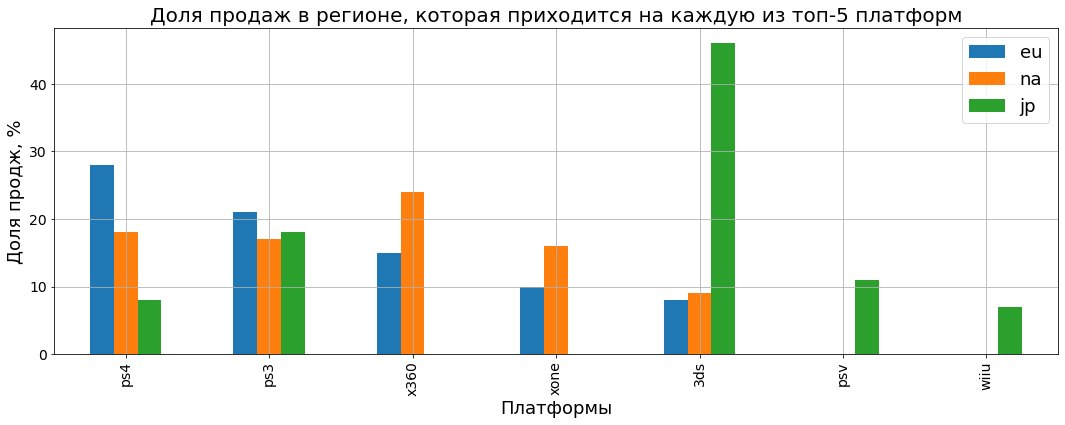

In [70]:
plt.figure(figsize=(16, 6))


df_actual_for_all_regions_top.plot.bar(x = 'platform', figsize = (18, 6))

plt.title('Доля продаж в регионе, которая приходится на каждую из топ-5 платформ', fontsize=20)
plt.xlabel('Платформы', fontsize=18)
plt.ylabel('Доля продж, %', fontsize=18)
plt.legend(['eu', 'na', 'jp'], fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show();

На графике хорошо видно, как отличаются доли продаж, приходящиеся на каждую из топ-платформ в зависимости от региона. Так, например, безусловным лидером в jp-регионе является платформа 3ds: на нее приходится около 50% всех продаж игр в регионе (но в eu и na-регионах на эту же платформу приходится не более 10% продаж). Платформы x360 и xone не входят в топ-5 платформ в jp-регионе, а платформы psv и wiiu, в свою очередь, не входят в топ-5 платформ eu и na-регионов. 

Теперь изучим, какие жанры являются наиболее популярными (топ-5) в каждом из регионов. 

Создадим сводную таблицу, которая будет состоять из столбцов 'genre', 'eu_sales', 'na_sales', 'jp_sales'. 

In [71]:
df_actual_for_genre = df_actual.pivot_table(index=['genre'], values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['sum'])

df_actual_for_genre = df_actual_for_genre.reset_index()

df_actual_for_genre.columns = ['genre', 'eu_sales', 'jp_sales', 'na_sales']

df_actual_for_genre

,genre,eu_sales,jp_sales,na_sales
0,action,159.34,52.80,177.84
1,adventure,9.46,8.24,8.92
2,fighting,10.79,9.44,19.79
3,misc,26.32,12.86,38.19
4,platform,21.41,8.63,25.38
5,puzzle,1.40,2.14,1.13
6,racing,27.29,2.50,17.22
7,role-playing,48.53,65.44,64.00
8,shooter,113.47,9.23,144.77
9,simulation,14.55,10.41,7.97


"Вырежем" из полученной сводной таблицы данные, содержащие информацию о топ-5 жанров для eu-региона.

In [72]:
df_actual_genre_for_eu = df_actual_for_genre.loc[:, 'genre':'eu_sales']

df_actual_genre_for_eu = df_actual_genre_for_eu.sort_values(by='eu_sales', ascending=False)

df_actual_genre_for_eu = df_actual_genre_for_eu.reset_index()

df_actual_genre_for_eu.drop('index', inplace=True, axis=1)

df_actual_genre_for_eu_top = df_actual_genre_for_eu.loc[:4]

df_actual_genre_for_eu_top

,genre,eu_sales
0,action,159.34
1,shooter,113.47
2,sports,69.09
3,role-playing,48.53
4,racing,27.29


"Вырежем" из полученной сводной таблицы данные, содержащие информацию о топ-5 жанров для na-региона.

In [73]:
df_actual_genre_for_na = df_actual_for_genre.loc[:, ['genre', 'na_sales']]

df_actual_genre_for_na = df_actual_genre_for_na.sort_values(by='na_sales', ascending=False)

df_actual_genre_for_na = df_actual_genre_for_na.reset_index()

df_actual_genre_for_na.drop('index', inplace=True, axis=1)

df_actual_genre_for_na_top = df_actual_genre_for_na.loc[:4]

df_actual_genre_for_na_top

,genre,na_sales
0,action,177.84
1,shooter,144.77
2,sports,81.53
3,role-playing,64.00
4,misc,38.19


"Вырежем" из полученной сводной таблицы данные, содержащие информацию о топ-5 жанров для jp-региона.

In [74]:
df_actual_genre_for_jp = df_actual_for_genre.loc[:, ['genre', 'jp_sales']]

df_actual_genre_for_jp = df_actual_genre_for_jp.sort_values(by='jp_sales', ascending=False)

df_actual_genre_for_jp = df_actual_genre_for_jp.reset_index()

df_actual_genre_for_jp.drop('index', inplace=True, axis=1)

df_actual_genre_for_jp_top = df_actual_genre_for_jp.loc[:4]

df_actual_genre_for_jp_top

,genre,jp_sales
0,role-playing,65.44
1,action,52.80
2,misc,12.86
3,simulation,10.41
4,fighting,9.44


Объединим данные в одну таблицу. 

In [75]:
df_actual_genre_for_eu_and_na_top = df_actual_genre_for_eu_top.merge(df_actual_genre_for_na_top, on=['genre'], how='outer')

df_actual_genre_for_all_regions_top = df_actual_genre_for_eu_and_na_top.merge(df_actual_genre_for_jp_top, on=['genre'], how='outer')

df_actual_genre_for_all_regions_top = df_actual_genre_for_all_regions_top.sort_values(by='eu_sales', ascending=False)

df_actual_genre_for_all_regions_top

,genre,eu_sales,na_sales,jp_sales
0,action,159.34,177.84,52.80
1,shooter,113.47,144.77,NaN
2,sports,69.09,81.53,NaN
3,role-playing,48.53,64.00,65.44
4,racing,27.29,NaN,NaN
5,misc,NaN,38.19,12.86
6,simulation,NaN,NaN,10.41
7,fighting,NaN,NaN,9.44


Отобразим данные из таблицы на сгруппированной столбчатой гистограмме (данные будут сгруппированы по жанрам, по оси Х отложены значения переменной 'genre', по оси У - рассчитанные значения продаж).

<Figure size 1152x432 with 0 Axes>

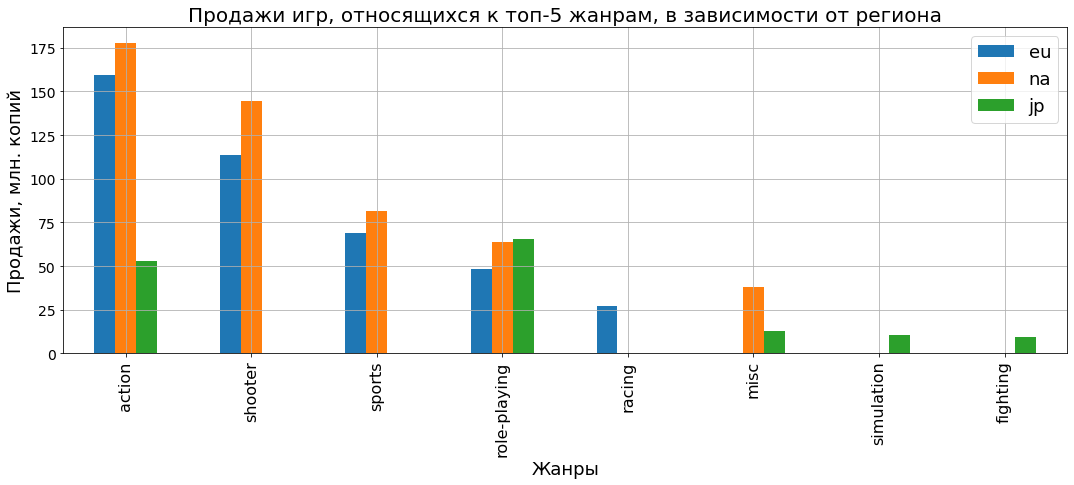

In [76]:
plt.figure(figsize=(16, 6))


df_actual_genre_for_all_regions_top.plot.bar(x = 'genre', figsize = (18, 6))

plt.title('Продажи игр, относящихся к топ-5 жанрам, в зависимости от региона', fontsize=20)
plt.xlabel('Жанры', fontsize=18)
plt.ylabel('Продажи, млн. копий', fontsize=18)
plt.legend(['eu', 'na', 'jp'], fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.grid()
plt.show();

Самые популярные жанры в eu и na-регионах - action, shooter и sports. При этом жанры shooter и sports не входят в топ-5 по популярности жанров в jp-регионе. И, наоборот, жанры simulation и fighting входят в топ-5 жанров только в jp-регионе. Жанр racing входит в топ-5 только в eu-регионе. 

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе. 

Для этого построим сводную таблицу, которая будет состоять из столбцов 'rating', 'eu_sales', 'na_sales', 'jp_sales'. Затем для каждого региона рассчитаем доли продаж игр с разными рейтингами. Затем построим сгруппированную столбчатую гистограмму. 

In [77]:
df_actual_for_genre_rating = df_actual.pivot_table(index=['rating'], values = ['eu_sales', 'na_sales', 'jp_sales'], aggfunc=['sum'])

df_actual_for_genre_rating = df_actual_for_genre_rating.reset_index()

df_actual_for_genre_rating.columns = ['rating', 'eu_sales', 'jp_sales', 'na_sales']

df_actual_for_genre_rating = df_actual_for_genre_rating.sort_values(by='eu_sales', ascending=False)

df_actual_for_genre_rating = df_actual_for_genre_rating.reindex(columns=['rating', 'eu_sales', 'na_sales', 'jp_sales'])

df_actual_for_genre_rating = df_actual_for_genre_rating.replace({'rating' : { 'M' : 'Для взрослых', 'E' : 'Для всех', 'not_classified' : 'Нет рейтинга', 'E10+' : 'От 10 лет и старше', 'T' : 'Подросткам'}})

df_actual_for_genre_rating

,rating,eu_sales,na_sales,jp_sales
2,Для взрослых,205.95,242.24,22.35
0,Для всех,115.40,117.79,29.27
4,Нет рейтинга,70.51,83.30,103.26
1,От 10 лет и старше,57.92,77.84,8.57
3,Подросткам,57.04,69.80,29.13


In [78]:
sales_eu_rating = df_actual_for_genre_rating['eu_sales'].sum()
sales_na_rating = df_actual_for_genre_rating['na_sales'].sum()
sales_jp_rating = df_actual_for_genre_rating['jp_sales'].sum()

df_actual_for_genre_rating['eu_share'] = round((df_actual_for_genre_rating['eu_sales'] / sales_eu_rating * 100), 0)
df_actual_for_genre_rating['na_share'] = round((df_actual_for_genre_rating['na_sales'] / sales_na_rating * 100), 0)
df_actual_for_genre_rating['jp_share'] = round((df_actual_for_genre_rating['jp_sales'] / sales_jp_rating * 100), 0)

df_actual_for_genre_rating.drop(['eu_sales', 'na_sales', 'jp_sales'], inplace=True, axis=1)

df_actual_for_genre_rating

,rating,eu_share,na_share,jp_share
2,Для взрослых,41.0,41.0,12.0
0,Для всех,23.0,20.0,15.0
4,Нет рейтинга,14.0,14.0,54.0
1,От 10 лет и старше,11.0,13.0,4.0
3,Подросткам,11.0,12.0,15.0


<Figure size 1152x432 with 0 Axes>

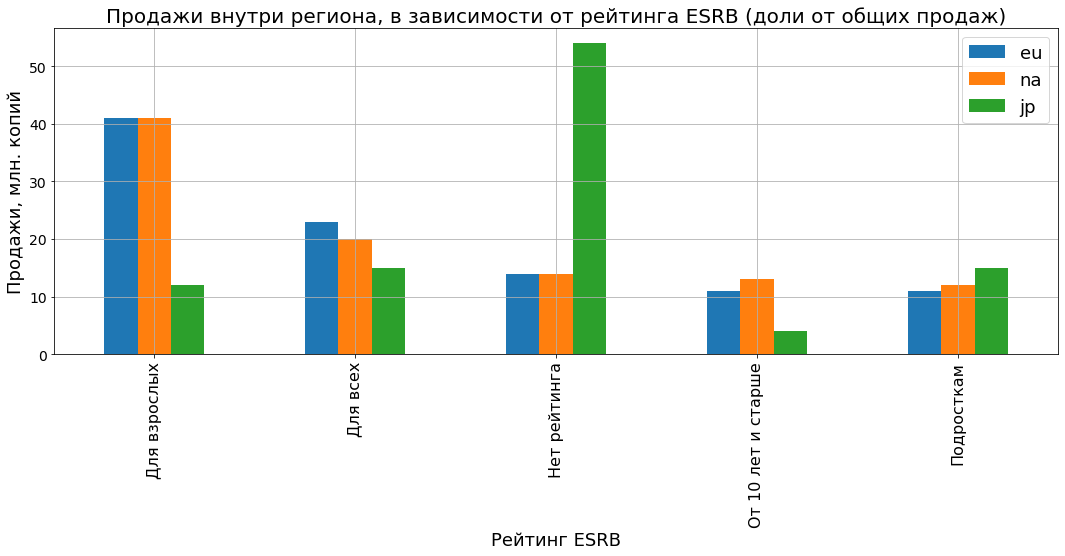

In [79]:
plt.figure(figsize=(16, 6))

df_actual_for_genre_rating.plot.bar(x = 'rating', figsize = (18, 6))

plt.title('Продажи внутри региона, в зависимости от рейтинга ESRB (доли от общих продаж)', fontsize=20)
plt.xlabel('Рейтинг ESRB', fontsize=18)
plt.ylabel('Продажи, млн. копий', fontsize=18)
plt.legend(['eu', 'na', 'jp'], fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.grid()
plt.show();

В eu и na-регионах наибольшая доля продаж приходится на игры с рейтингом "для взрослых" (доли в eu и na равны), наименьшие доли продаж - на игры с рейтингами "от 10 лет и старше", "подросткам", а также на игры с неопределённым рейтингом. В этом отношении регионы eu и na не отличаются между собой. В jp-регионе абсолютное большиство продаж (более 50%) приходится на игры без определенного рейтинга ESRB, далее примерно в равных долях идут игры с рейтингами "подросткам" и "для всех". Наименьшая доля продаж в jp-регионе приходится на игры с рейтингом "от 10 лет и старше". 

## Проверка гипотез.

<b>Гипотеза 1.</b> Средние пользовательские рейтинги платформ xone и pc одинаковые. 

Необходимо проверить гипотезу о равенстве средних двух генеральных совокупностей. 

Сформулируем нулевую и альтернативную гипотезы. 

Нулевая гипотеза: средние пользовательские рейтинги платформ xone и pc равны. 

Альтернативная гипотеза: средние пользовательские рейтинги платформ xone и pc не равны. 

Передадим тесту для сравнения два массива, которые содержат выборки значений user_score для пользователей платформ xone и pc, предварительно удалив из таблицы пропуски. 

In [80]:
result_hyp_1 = st.ttest_ind(df_actual[df_actual['platform'] == 'xone']['user_score'].dropna(), df_actual[df_actual['platform'] == 'pc']['user_score'].dropna())

print('p-значение: ', result_hyp_1.pvalue)

p-значение:  0.5535080500643661


In [81]:
df_actual_hyp_1 = df_actual.pivot_table(index=['platform'], values = ['user_score'], aggfunc=['mean'])

df_actual_hyp_1 = df_actual_hyp_1.reset_index()

df_actual_hyp_1.columns = ['platform', 'mean_user_score']

df_actual_hyp_1_only_xone_and_pc = df_actual_hyp_1.query('platform == "xone" or platform == "pc"')

df_actual_hyp_1_only_xone_and_pc

,platform,mean_user_score
2,pc,6.428641
10,xone,6.521429


Среднее значение пользовательского рейтинга платформы xone составляет 6,5, на платформе pc - 6,4. 

Поскольку р-значение равно 0,55 (а это больше 0,05), то альтернативная гипотеза о неравенстве средних не подтверждается, принимается нулевая гипотеза. Различия в средних оценках не выявлены. 

<b>Гипотеза 2.</b> Средние пользовательские рейтинги жанров Action и Sports разные.

Необходимо проверить гипотезу о равенстве средних двух генеральных совокупностей.

Сформулируем нулевую и альтернативную гипотезы.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.

Создадим два массива, которые содержат выборки значений user_score для жанров Action и Sports.

In [82]:
result_hyp_2 = st.ttest_ind(df_actual[df_actual['genre'] == 'action']['user_score'].dropna(), df_actual[df_actual['genre'] == 'sports']['user_score'].dropna())

print('p-значение: ', result_hyp_2.pvalue)

p-значение:  3.7163089460934874e-26


In [83]:
df_actual_hyp_2 = df_actual.pivot_table(index=['genre'], values = ['user_score'], aggfunc=['mean'])

df_actual_hyp_2 = df_actual_hyp_2.reset_index()

df_actual_hyp_2.columns = ['genre', 'mean_user_score']

df_actual_hyp_2_only_action_and_sports = df_actual_hyp_2.query('genre == "action" or genre == "sports"')

df_actual_hyp_2_only_action_and_sports

,genre,mean_user_score
0,action,6.825048
10,sports,5.455897


Средний пользовательский рейтинг жанра Action составляет 6,8, жанра Sports - 5,5. 

Посколько р-значение равно 3,7 умножить на 10 в минус 26 степени (а это число меньше 0,05 и даже 0,01), то мы принимаем альтернативную гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports отличаются.

## Общий вывод. 

В ходе исследования мы:

1. изучили, как менялось количество выпущенных игр по годам и выяснили, что количество выпускаемых игр стало стремительно увеличиваться с середины 90-х годов вплоть до 2008 года, после чего количество выпускаемых каждый год игр постепенно уменьшалось;

2. опредили 6 платформ с наибольшим суммарным количством продаж: ps2, x360, ps3, wii, ds, ps. Мы изучили, как менялись продажи с течением времени на этих платформах и определили, что новые платформы появляются с характерной периодичностью в 6 лет, а типичная "продолжительность жизни" платформы - 10 лет. Чтобы делать прогноз на 2017 года, мы решили для дальнейшего анализа использовать данные за 5 лет (2012 - 2016 годы);

3. определили 2 платформы, которые, по нашему мнению, с наибольшей вероятностью покажут наилучшие результаты продаж в 2017 году: ps4 и xone;

4. выявили, что оценки критиков слабо связаны с общими продажами (к-т корреляции Пирсона находится в пределах 0,3 - 0,4). Нам не удалось выявить связь между оценками пользователей и общими продажами; 

5. выяснили, что наиболее успешным жанром с точки зрения показателей продаж является Shooter;

6. для каждого региона определили топ-5 платформ и жанров по количеству продаж и показали различия между регионами по этим признакам. Показали, как продажи игр внутри каждого региона отличаются в зависимости от рейтинга ESRB. 